# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

(array([  0.,   0.,   1.,   0.,   2.,   2.,   4.,   5.,  13.,  11.,   7.,
         26.,  27.,  25.,  33.,  62.,  64.,  89., 123., 131., 187., 205.,
        232., 257., 330., 361., 382., 411., 434., 468., 504., 517., 528.,
        454., 456., 464., 462., 430., 370., 323., 253., 226., 230., 178.,
        144., 137., 102.,  73.,  65.,  50.,  43.,  28.,  26.,  13.,  10.,
         11.,   3.,   3.,   2.,   2.,   0.,   1.,   0.,   0.,   0.]),
 array([0.2       , 0.22485566, 0.24971133, 0.27456699, 0.29942266,
        0.32427832, 0.34913399, 0.37398965, 0.39884531, 0.42370098,
        0.44855664, 0.47341231, 0.49826797, 0.52312364, 0.5479793 ,
        0.57283496, 0.59769063, 0.62254629, 0.64740196, 0.67225762,
        0.69711329, 0.72196895, 0.74682462, 0.77168028, 0.79653594,
        0.82139161, 0.84624727, 0.87110294, 0.8959586 , 0.92081427,
        0.94566993, 0.97052559, 0.99538126, 1.02023692, 1.04509259,
        1.06994825, 1.09480392, 1.11965958, 1.14451524, 1.16937091,
        1.194226

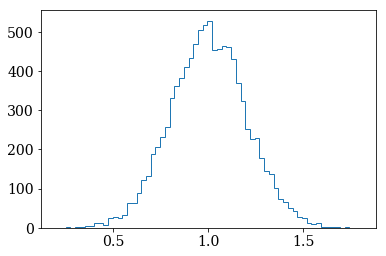

In [23]:
#PROBLEM 2
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
from scipy import stats
import numpy as np
Nu=1.
Sigma=0.2
x=10000
y=np.random.normal(Nu, Sigma, x)
sigmaG = sigmaG(y)
binSize=((2.7)*sigmaG)/((x**(1.0/3.0)))
#print (binSize)
bins = np.append(np.arange(start=0.2,stop=1.8,step=binSize),1.8)
plt.hist(y,bins,histtype='step')

[0.54463568 1.06591974 0.9393459  ... 0.84029311 0.65761419 1.20419716] [ 7.6277635   2.1110601  -1.10363702 ...  2.06757431  1.67888892
  1.68854843]
0.0930030971421422 7.649574347438416


(array([12960.]), array([0.2, 1.8]), <a list of 1 Patch objects>)

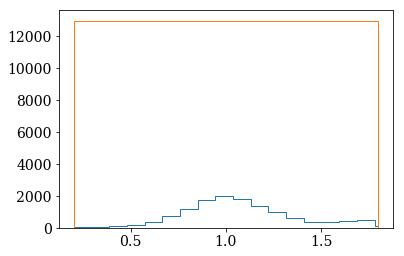

In [35]:
#PROBLEM 3
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
from scipy import stats
import numpy as np
Nu=1.
Sigma=0.2
x=10000
y=np.random.normal(Nu, Sigma, x)
z=cauchy.rvs(2,0.5,10000)
print (y,z) 
comb=np.concatenate((y,z),axis=0)
Sigma1=np.std(comb)
sigmaG1 = sigmaG(z)
binSizeFD=((2.7)*sigmaG1)/((x**(1.0/3.0)))
binSizeScott=((3.5*Sigma1)/(x**(1./3.)))
binsFD = np.append(np.arange(start=0.2,stop=1.8,step=binSizeFD),1.8)
binsS = np.append(np.arange(start=0.2,stop=1.8,step=binSizeScott),1.8)
print (binSizeFD, binSizeScott)
plt.hist(comb,binsFD,histtype='step')
plt.hist(comb,binsS,histtype='step')

C:\Users\Sarah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KeyboardInterrupt: 

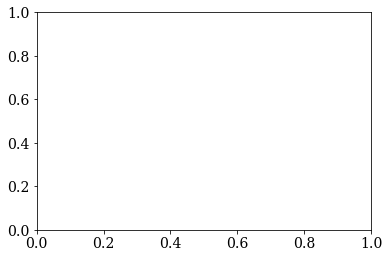

In [44]:
#PROBLEM 4
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm, chi2
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
from scipy import stats
import numpy as np

N=2
yy=[]
for i in np.arange(100000):
    xx = chi2.rvs(5,size=N,loc=1,scale=.2)
    yy.append(xx) 
plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True)
print (xx)
yy=[]
for i in np.arange(100000):
    xx = chi2.rvs(5,size=N,loc=1,scale=.2)
    yy.append(xx)
print (xx)    
plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True)
plt.show
#I could not get this to run, but I can't see what's wrong with it. It just took forever.